In [35]:
#Importing libraries and packages
import pandas as pd
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score,precision_score
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import tree
import matplotlib.pyplot as plt
import matplotlib.image as pltimg
import statsmodels.api as smf
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, confusion_matrix, roc_curve, auc

In [37]:
# Part 1: Data Cleansing
# Specify the path to your XLSX file
file_path = 'C:\\Users\\seanm\\Downloads\\marketing_campaign.xlsx'

# Read the XLSX file into a DataFrame
df = pd.read_excel(file_path)

# Display the first few rows to ensure it loaded correctly
print(df.head())

     ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0  2012-09-04       58       635  ...                  7             0   
1  2014-03-08       38        11  ...                  5             0   
2  2013-08-21       26       426  ...                  4             0   
3  2014-02-10       26        11  ...                  6             0   
4  2014-01-19       94       173  ...                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0

In [39]:
# Display basic info
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [59]:
# Drop columns with a high percentage of missing values
threshold = 0.5
df = df[df.columns[df.isnull().mean() < threshold]]

# Fill missing values in numerical columns with the median
for col in df.select_dtypes(include=['float64', 'int64']):
    df[col].fillna(df[col].median(), inplace=True)

# Fill missing values in categorical columns with the mode
for col in df.select_dtypes(include=['object']):
    df[col].fillna(df[col].mode()[0], inplace=True)

# Encode categorical variables
df = pd.get_dummies(df, drop_first=True)

# Ensure no missing values remain
print(df.isnull().sum().sum())

# Display the first few rows to ensure it loaded correctly
print(df.head(30))

0
      ID  Year_Birth   Income  Kidhome  Teenhome  Recency  MntWines  \
0   5524        1957  58138.0        0         0       58       635   
1   2174        1954  46344.0        1         1       38        11   
2   4141        1965  71613.0        0         0       26       426   
3   6182        1984  26646.0        1         0       26        11   
4   5324        1981  58293.0        1         0       94       173   
5   7446        1967  62513.0        0         1       16       520   
6    965        1971  55635.0        0         1       34       235   
7   6177        1985  33454.0        1         0       32        76   
8   4855        1974  30351.0        1         0       19        14   
9   5899        1950   5648.0        1         1       68        28   
10  1994        1983  51381.5        1         0       11         5   
11   387        1976   7500.0        0         0       59         6   
12  2125        1959  63033.0        0         0       82       194   
13  

In [61]:
# Part 2: Logistic Regression Model

# Define the target and features
X = df.drop('Response', axis=1)
y = df['Response']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build the logistic regression model
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)

# Predict and evaluate the logistic regression model
y_pred_log = log_model.predict(X_test)
print("Logistic Regression Model")
print("Accuracy:", accuracy_score(y_test, y_pred_log))
print("Precision:", precision_score(y_test, y_pred_log))
print("Recall:", recall_score(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log))

# Analyze significant variables
log_coefs = pd.Series(log_model.coef_[0], index=X.columns).sort_values(ascending=False)
print("Logistic Regression Coefficients:")
print(log_coefs)

Logistic Regression Model
Accuracy: 0.84375
Precision: 0.49056603773584906
Recall: 0.37681159420289856
              precision    recall  f1-score   support

           0       0.89      0.93      0.91       379
           1       0.49      0.38      0.43        69

    accuracy                           0.84       448
   macro avg       0.69      0.65      0.67       448
weighted avg       0.83      0.84      0.84       448

Logistic Regression Coefficients:
MntMeatProducts           0.989891
AcceptedCmp5              0.972078
Education_PhD             0.928843
AcceptedCmp4              0.915246
NumCatalogPurchases       0.851669
                            ...   
MntWines                 -0.598587
Dt_Customer_2013-04-29   -0.600515
NumStorePurchases        -0.850689
Teenhome                 -0.940307
Recency                  -1.624749
Length: 698, dtype: float64


In [63]:
# Part 3: SVM Model

# Build the SVM model
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

# Predict and evaluate the SVM model
y_pred_svm = svm_model.predict(X_test)
print("SVM Model")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Precision:", precision_score(y_test, y_pred_svm))
print("Recall:", recall_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))

# Analyze significant variables for SVM
svm_coefs = pd.Series(svm_model.coef_[0], index=X.columns).sort_values(ascending=False)
print("SVM Coefficients:")
print(svm_coefs)

SVM Model
Accuracy: 0.8214285714285714
Precision: 0.44329896907216493
Recall: 0.6231884057971014
              precision    recall  f1-score   support

           0       0.93      0.86      0.89       379
           1       0.44      0.62      0.52        69

    accuracy                           0.82       448
   macro avg       0.68      0.74      0.70       448
weighted avg       0.85      0.82      0.83       448

SVM Coefficients:
MntMeatProducts           0.905884
Education_PhD             0.845076
NumCatalogPurchases       0.772147
MntGoldProds              0.713869
Education_Master          0.707678
                            ...   
Dt_Customer_2013-01-06   -0.457352
Dt_Customer_2013-04-29   -0.494586
Teenhome                 -0.634266
NumStorePurchases        -0.698984
Recency                  -1.231282
Length: 698, dtype: float64


In [65]:
# Part 4: Model Comparison

# Compare the performance of both models
print("Comparison of Models")
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log))
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Logistic Regression Precision:", precision_score(y_test, y_pred_log))
print("SVM Precision:", precision_score(y_test, y_pred_svm))
print("Logistic Regression Recall:", recall_score(y_test, y_pred_log))
print("SVM Recall:", recall_score(y_test, y_pred_svm))

# Recommend the best model based on metrics
if accuracy_score(y_test, y_pred_log) > accuracy_score(y_test, y_pred_svm):
    recommended_model = "Logistic Regression"
else:
    recommended_model = "SVM"

print(f"The recommended model is {recommended_model} based on the accuracy, precision, and recall metrics.")

Comparison of Models
Logistic Regression Accuracy: 0.84375
SVM Accuracy: 0.8214285714285714
Logistic Regression Precision: 0.49056603773584906
SVM Precision: 0.44329896907216493
Logistic Regression Recall: 0.37681159420289856
SVM Recall: 0.6231884057971014
The recommended model is Logistic Regression based on the accuracy, precision, and recall metrics.


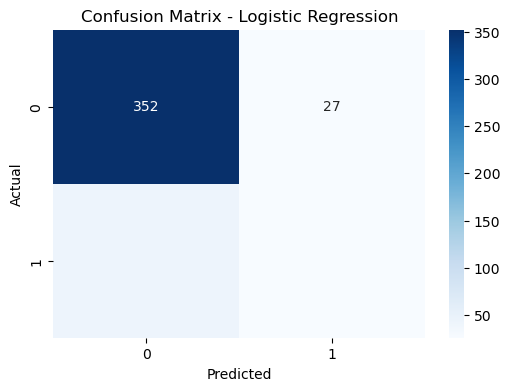

In [67]:
# Confusion Matrix for Logistic Regression
cm_log = confusion_matrix(y_test, y_pred_log)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_log, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

SVM Model
Accuracy: 0.8214285714285714
Precision: 0.44329896907216493
Recall: 0.6231884057971014
              precision    recall  f1-score   support

           0       0.93      0.86      0.89       379
           1       0.44      0.62      0.52        69

    accuracy                           0.82       448
   macro avg       0.68      0.74      0.70       448
weighted avg       0.85      0.82      0.83       448



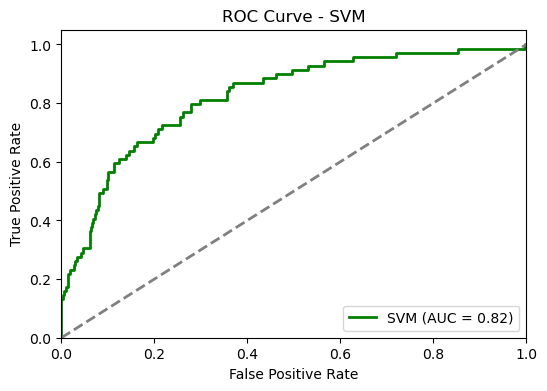

In [69]:
# ROC Curve for SVM

# Build the SVM model with probability estimates
svm_model = SVC(kernel='linear', probability=True)
svm_model.fit(X_train, y_train)

# Predict and evaluate the SVM model
y_pred_svm = svm_model.predict(X_test)
print("SVM Model")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Precision:", precision_score(y_test, y_pred_svm))
print("Recall:", recall_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))

# ROC Curve for SVM
y_pred_prob_svm = svm_model.predict_proba(X_test)[:, 1]
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_pred_prob_svm)
roc_auc_svm = auc(fpr_svm, tpr_svm)
plt.figure(figsize=(6, 4))
plt.plot(fpr_svm, tpr_svm, color='green', lw=2, label=f'SVM (AUC = {roc_auc_svm:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - SVM')
plt.legend(loc="lower right")
plt.show()